In [1]:
import os
os.chdir('../../')
!ls

food_trade


In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
from scipy import stats
from food_trade.demand_supply.balance_trade import get_area_codes, get_prod_matrix, get_trade_matrix, re_export_algo
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
sns.set()
%config InlineBackend.figure_format = 'retina'

In [3]:
df_country_log_false_thresh_1 = pd.read_parquet('../../data/combined_features/df_country_log_false_thresh_1.parquet.gzip')
df_country_log_true_thresh_1 = pd.read_parquet('../../data/combined_features/df_country_log_true_thresh_1.parquet.gzip')

In [45]:
df = df_country_log_false_thresh_1
trade = df.groupby(['to_iso3']).sum()[['supply_cereals_all']].reset_index().rename(
    columns={'supply_cereals_all': 'imports', 'to_iso3': 'iso3'}).merge(
    df.groupby(['from_iso3']).sum()[['supply_cereals_all']].reset_index().rename(
        columns={'supply_cereals_all': 'exports', 'from_iso3': 'iso3'}), how='outer')
trade = trade.fillna(0)

In [46]:
trade['flows'] = trade['imports'] + trade['exports']

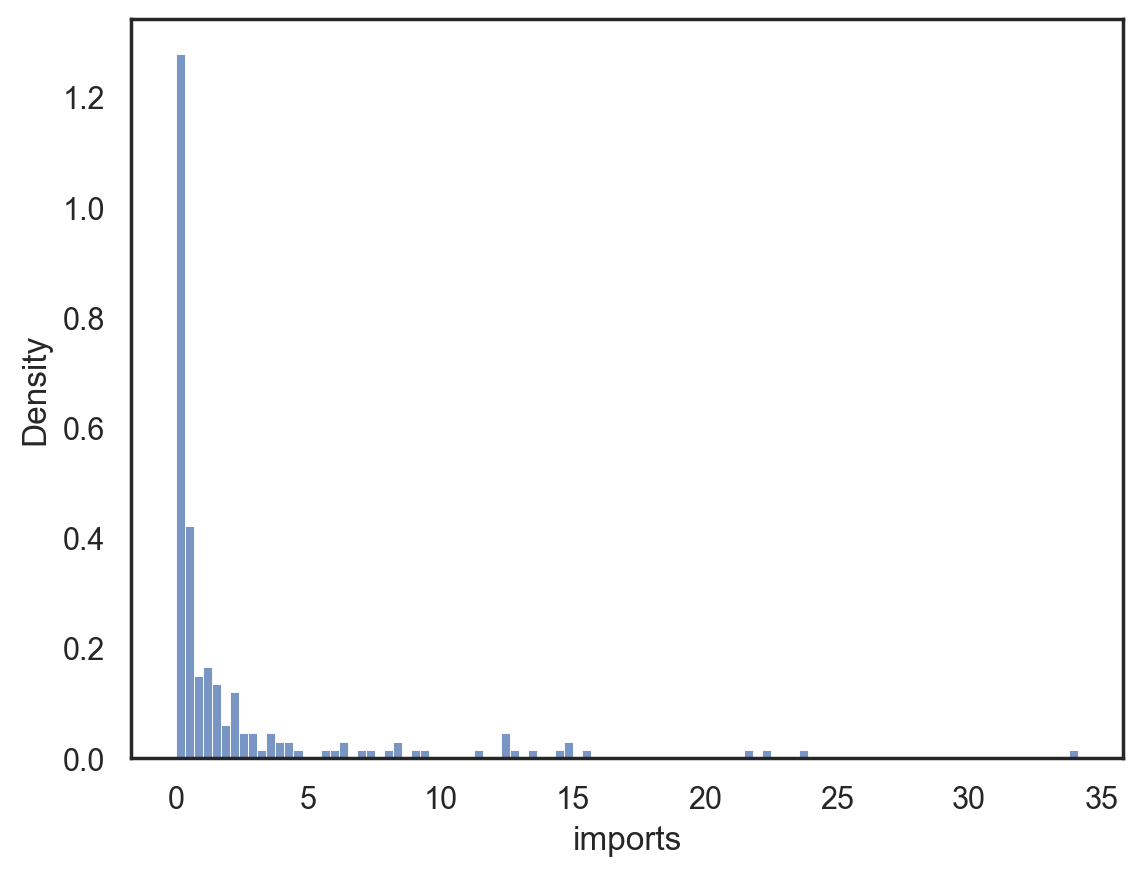

In [47]:
sns.histplot(x=trade['imports']/1e6, stat="density", bins=100)
plt.show()

<Axes: ylabel='Density'>

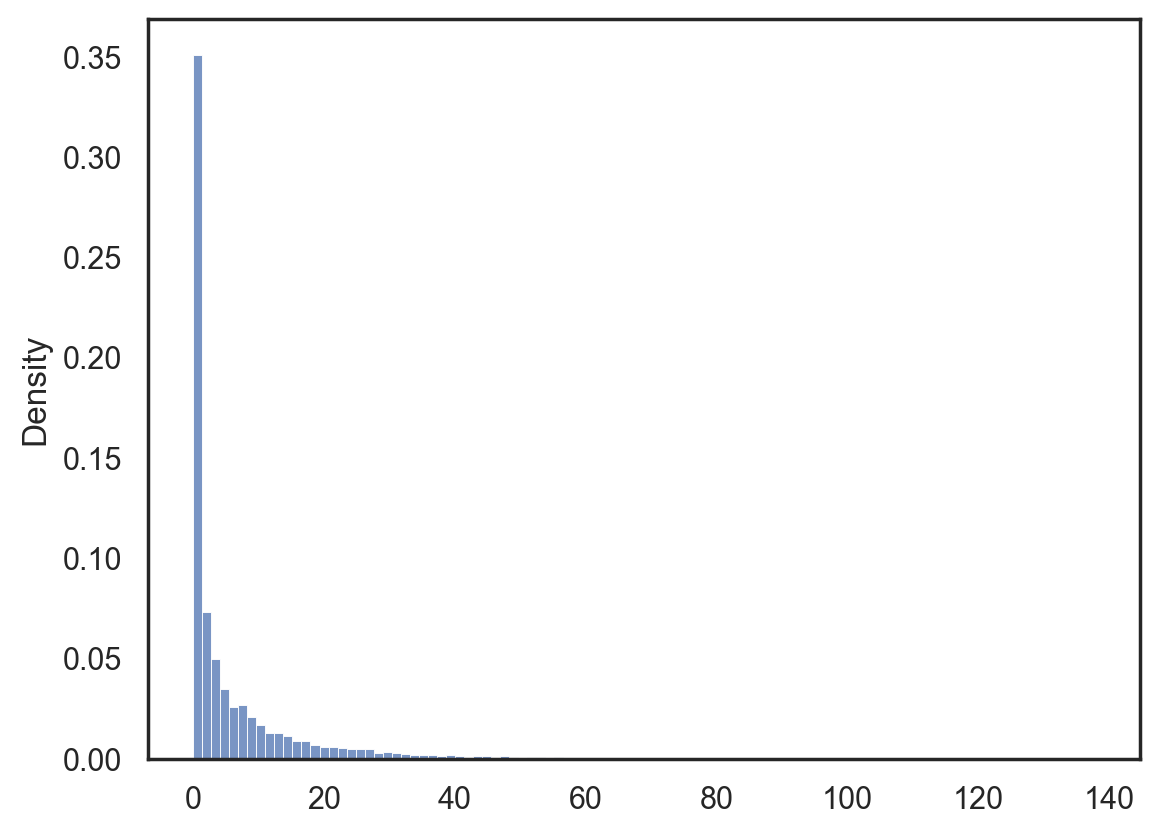

In [48]:
sample = stats.gamma.rvs(a=0.3, loc=0, scale=20, size=10000)
sns.histplot(x=sample, stat="density", bins=100)

In [49]:
stats.kstest(trade['imports']/1e6, 'gamma', args=(0.3, 0, 20))

KstestResult(statistic=0.2256470865288709, pvalue=3.315064988525639e-09, statistic_location=1.543604619760071, statistic_sign=1)

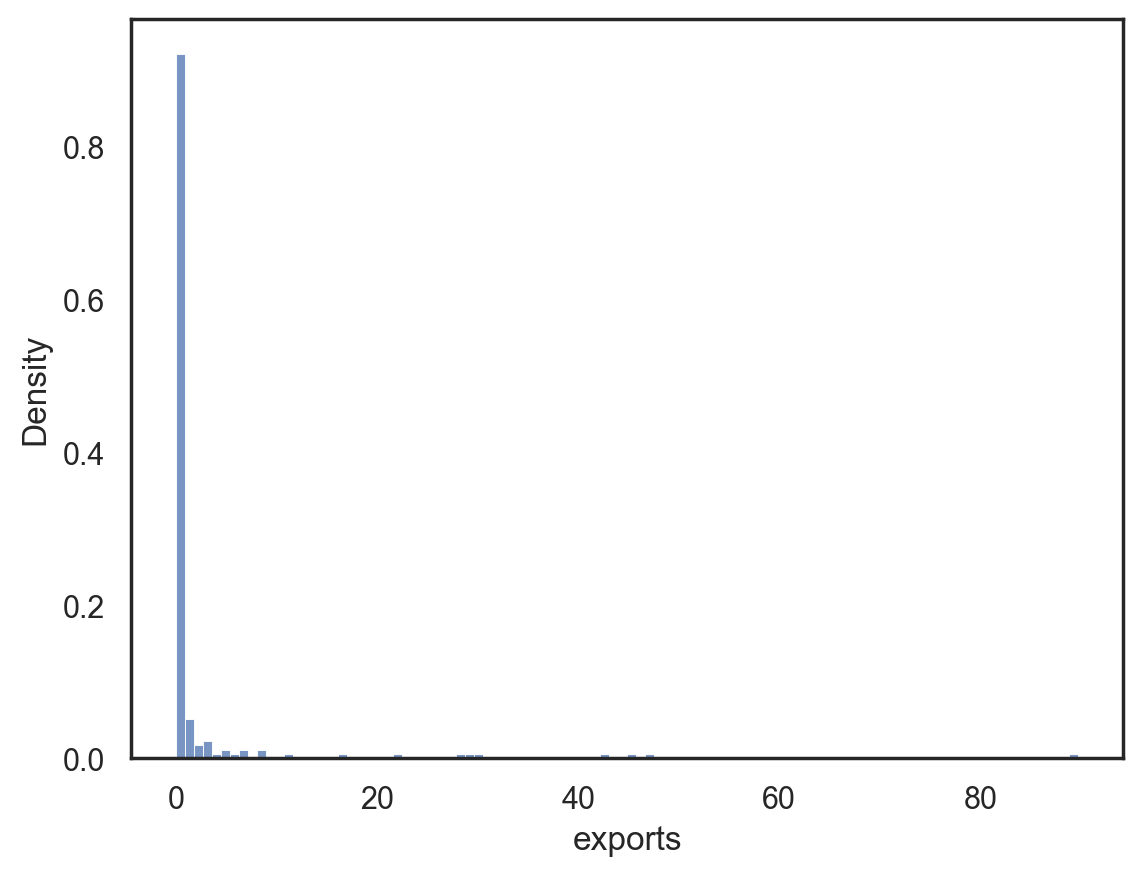

In [50]:
sns.histplot(x=trade['exports']/1e6, stat="density", bins=100)
plt.show()

<Axes: ylabel='Density'>

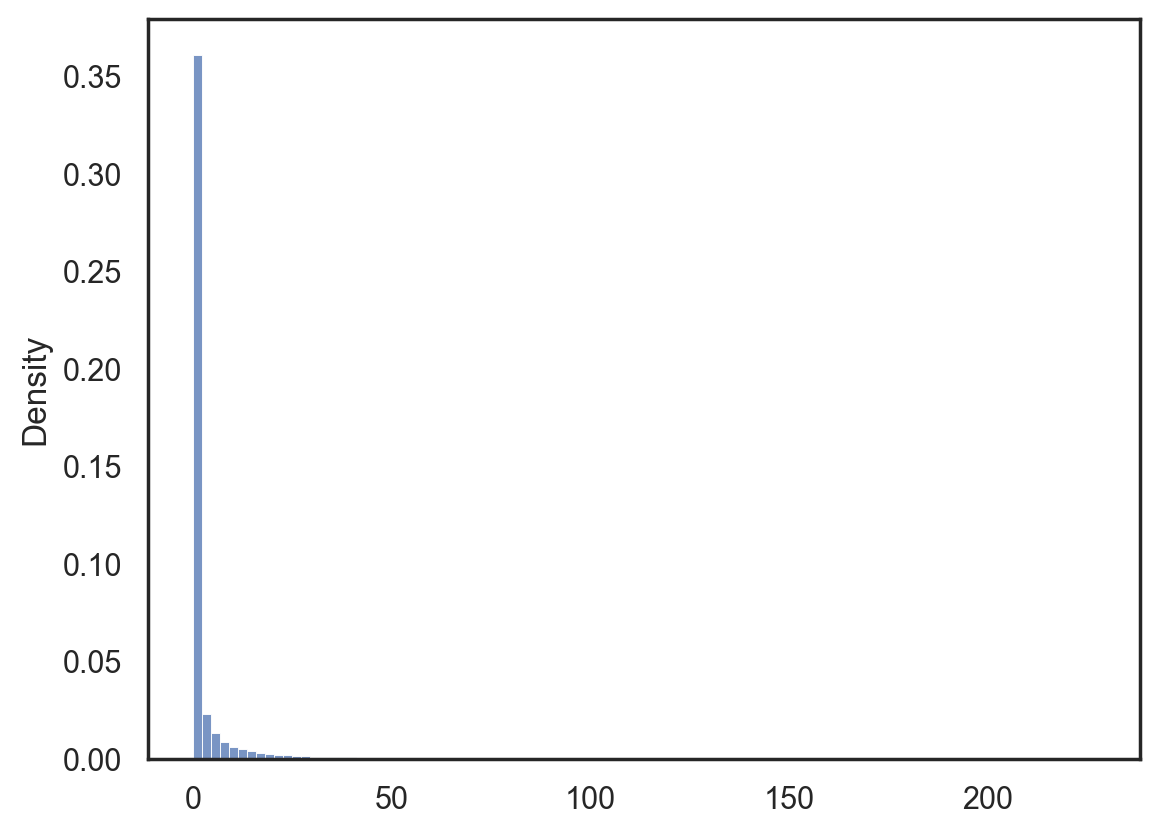

In [51]:
sample = stats.gamma.rvs(a=0.1, loc=0, scale=25, size=100000)
sns.histplot(x=sample, stat="density", bins=100)

In [52]:
stats.kstest(trade['exports']/1e6, 'gamma', args=(0.1, 0, 25))

KstestResult(statistic=0.18974358974358974, pvalue=1.2732364595768567e-06, statistic_location=0.0, statistic_sign=1)

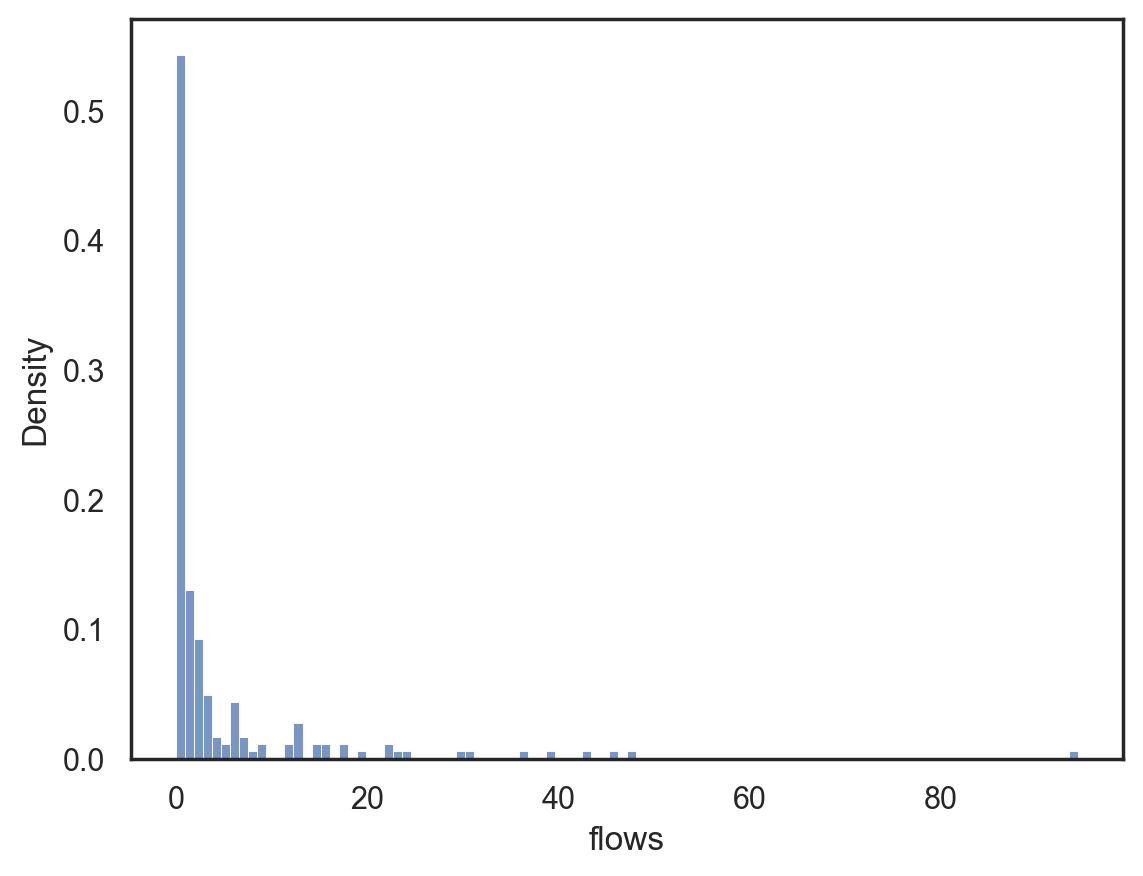

In [53]:
sns.histplot(x=trade['flows']/1e6, stat="density", bins=100)
plt.show()

<Axes: ylabel='Density'>

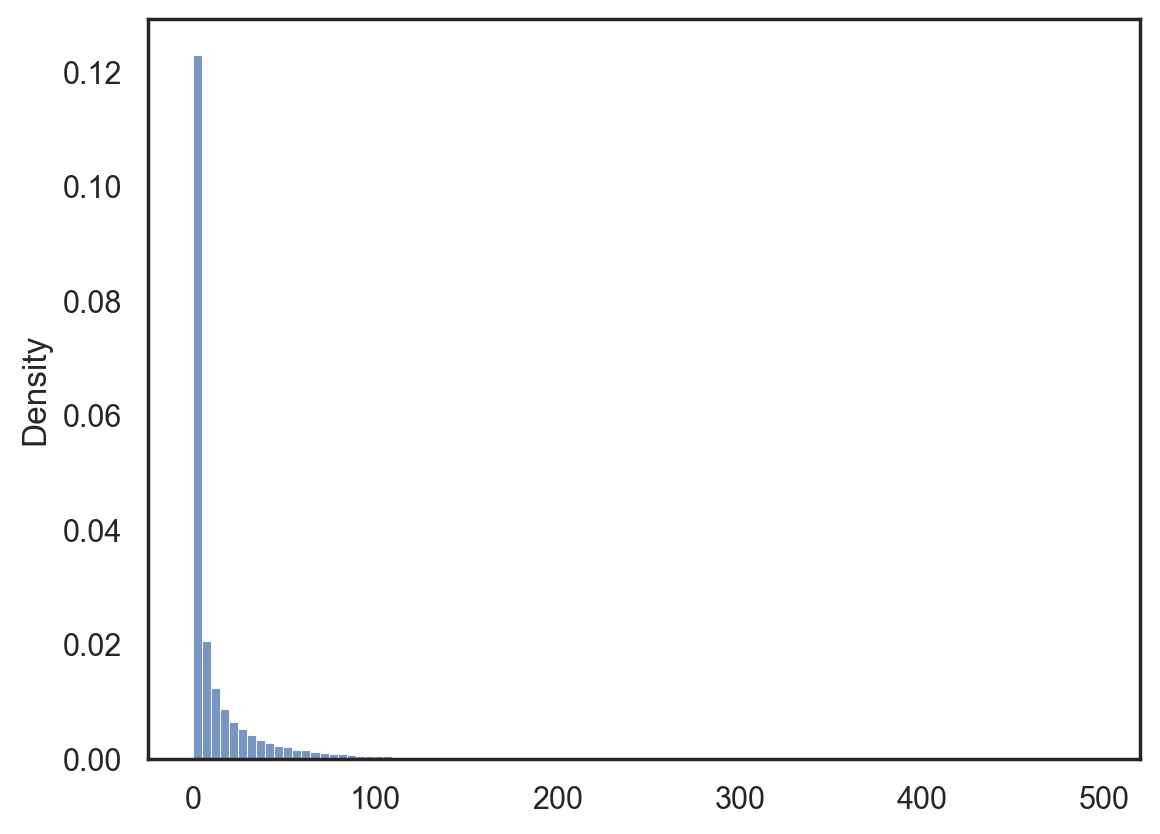

In [54]:
sample = stats.gamma.rvs(a=0.25, loc=0, scale=50, size=100000)
sns.histplot(x=sample, stat="density", bins=100)

In [55]:
stats.kstest(trade['flows']/1e6, 'gamma', args=(0.25, 0, 50))

KstestResult(statistic=0.2048394375080076, pvalue=1.187531224084724e-07, statistic_location=3.914602153176769, statistic_sign=1)

In [56]:
trade = pd.melt(trade, id_vars='iso3', value_vars=['imports', 'exports', 'flows'])

In [57]:
trade['value'] = trade['value'] / 1e6

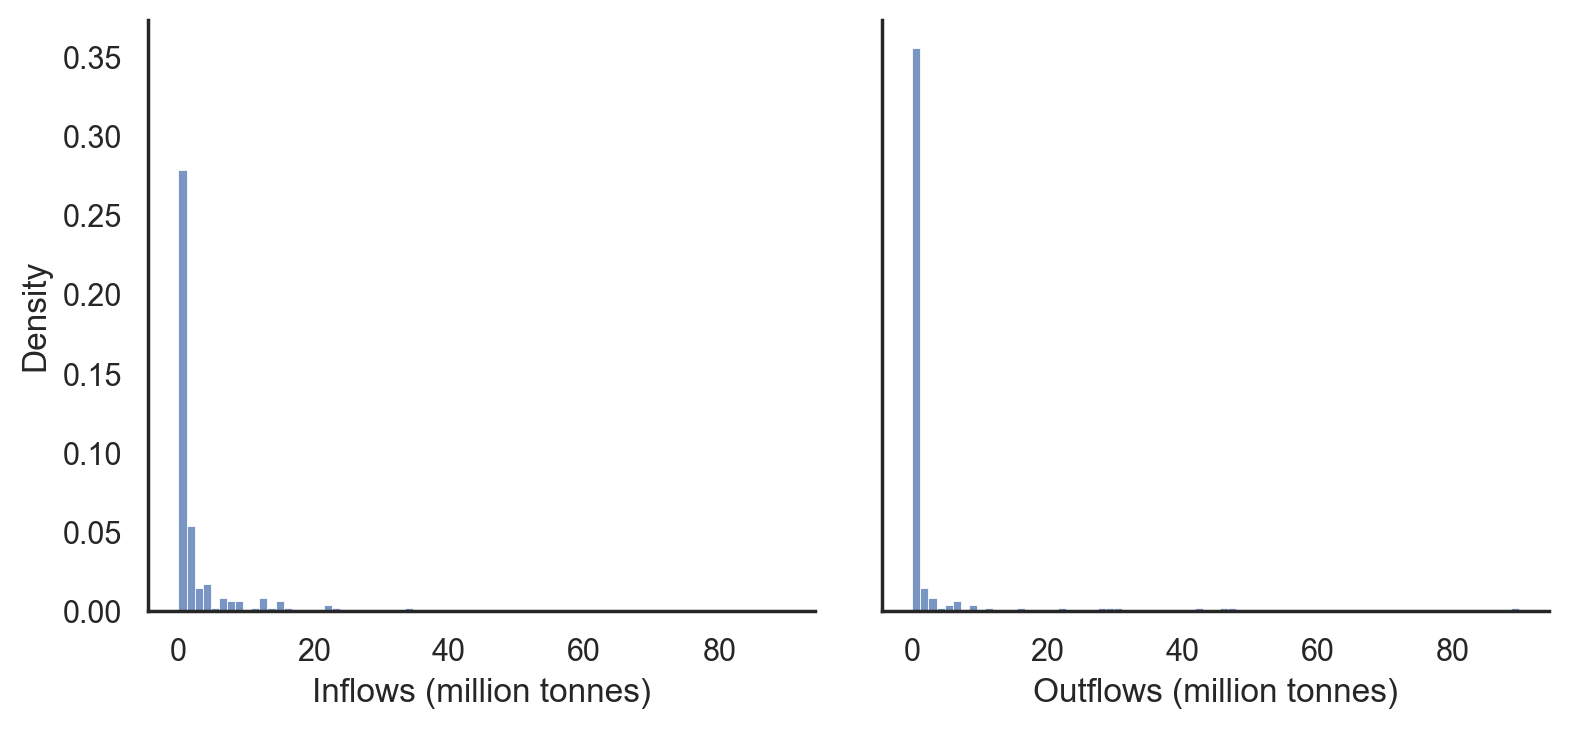

In [59]:
sns.set_style('white')
g = sns.displot(
    trade[trade['variable']!='flows'], x="value", col="variable", bins=75, 
    stat='density', 
    height=4, 
    col_order=['imports', 'exports'], facet_kws={'sharex': False}
)
g.set_titles(col_template="")
g.axes[0,0].set_xlabel('Inflows (million tonnes)')
g.axes[0,1].set_xlabel('Outflows (million tonnes)')
# g.axes[0,2].set_xlabel('Total Flows (million tonnes)')
plt.subplots_adjust(wspace = 0.1)
plt.show()

In [63]:
trade['value_log'] = np.log(trade['value']*1e6+1)

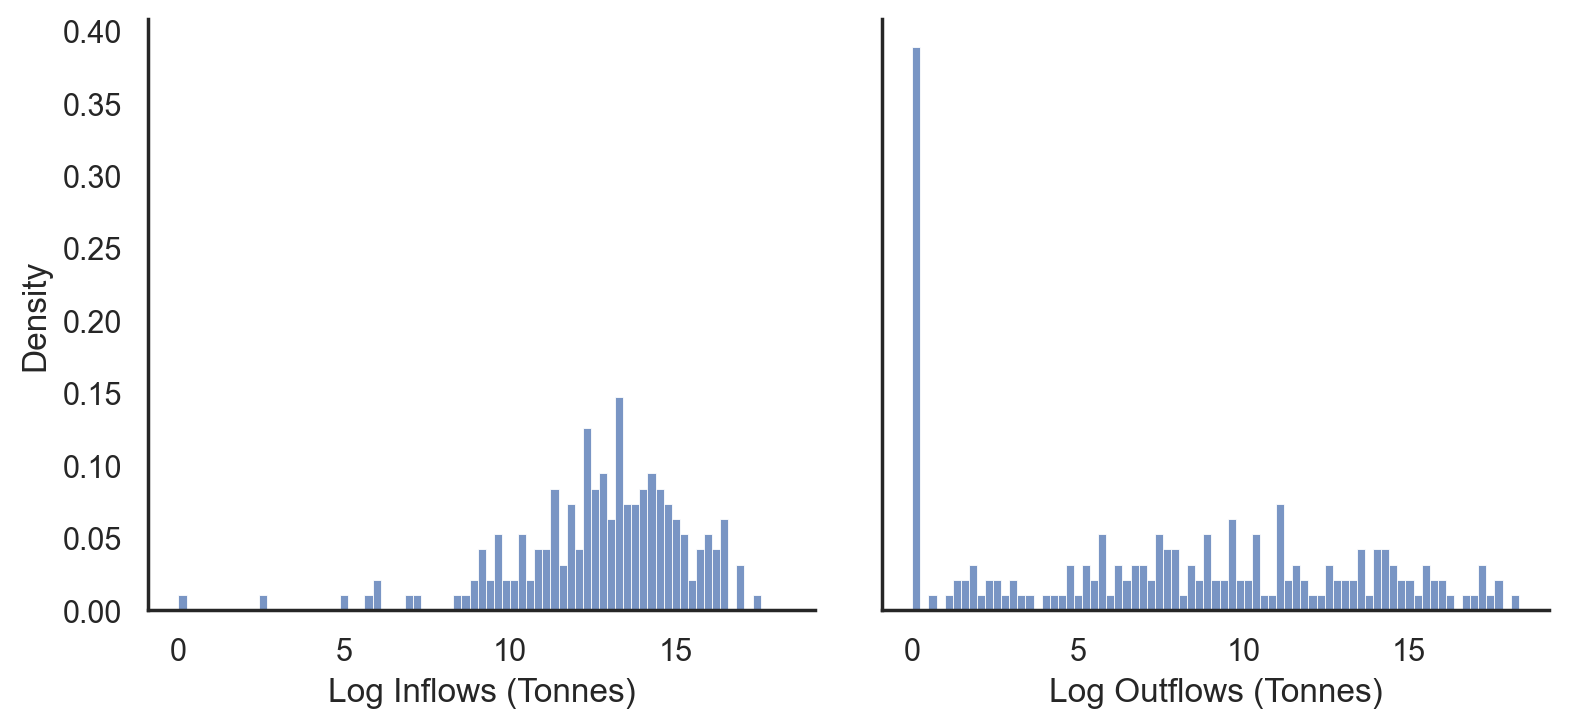

In [64]:
sns.set_style('white')
g = sns.displot(
    trade[trade['variable']!='flows'], x="value_log", col="variable", bins=75, 
    stat='density', 
    height=4, 
    col_order=['imports', 'exports'], facet_kws={'sharex': False}
)
g.set_titles(col_template="")
g.axes[0,0].set_xlabel('Log Inflows (Tonnes)')
g.axes[0,1].set_xlabel('Log Outflows (Tonnes)')
# g.axes[0,2].set_xlabel('Total Flows (million tonnes)')
plt.subplots_adjust(wspace = 0.1)
plt.show()